In [32]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load Boston housing data set from sklearn.dataset and print it

In [34]:
boston = pd.read_csv("D:\\Boston Dataset.csv")
boston.drop(columns=['Unnamed: 0'], axis=0, inplace=True)
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


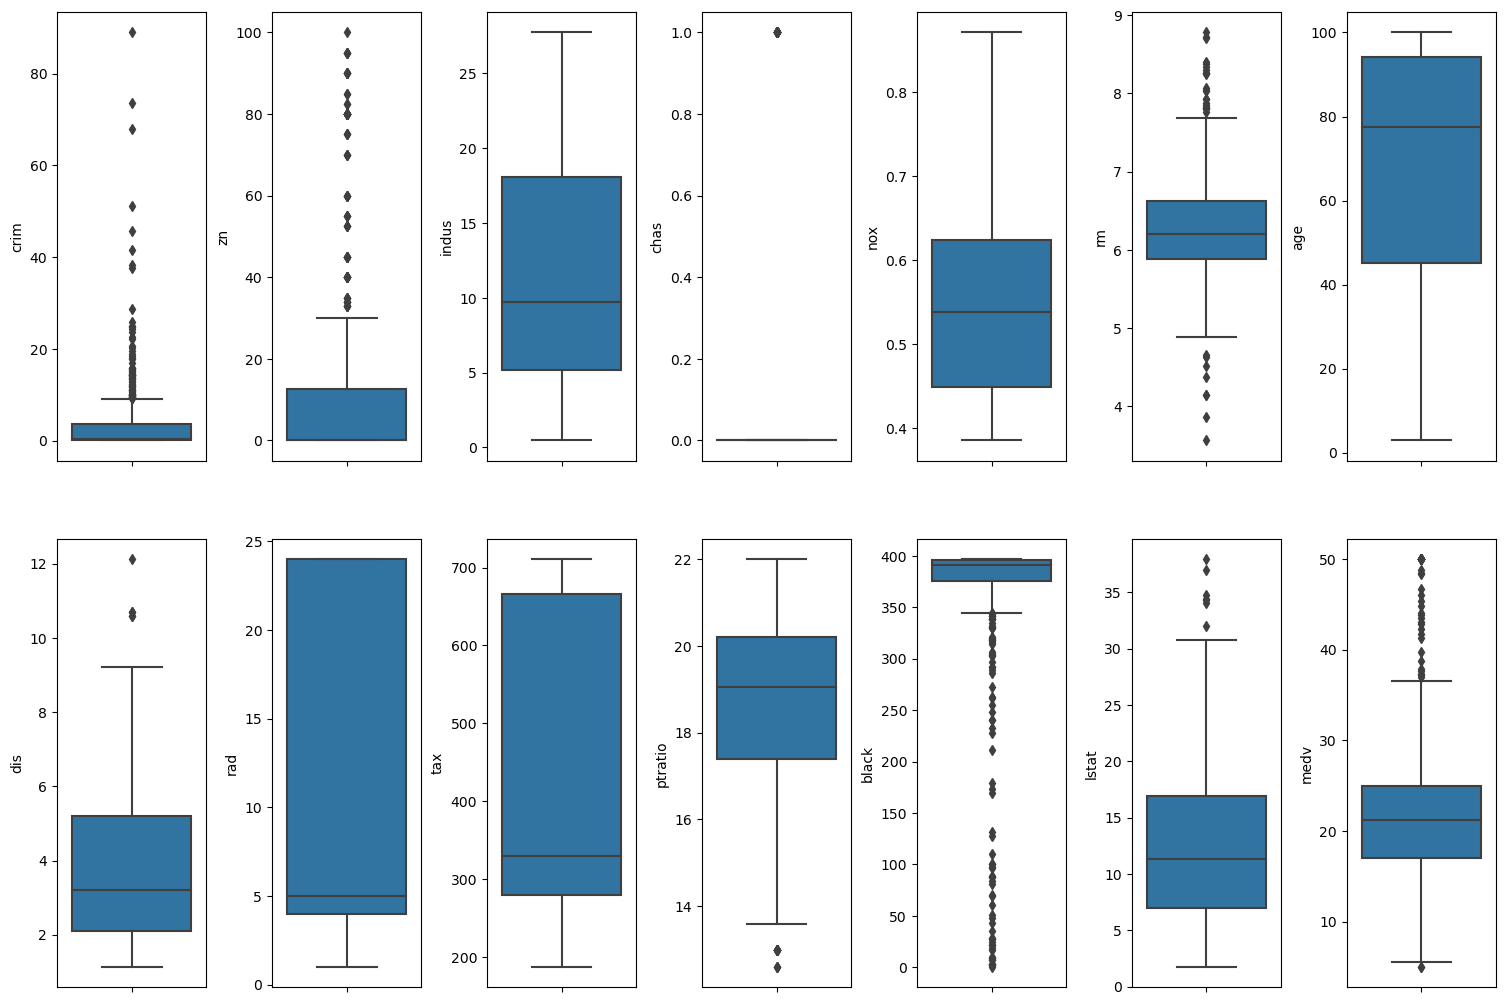

In [42]:
# create box plots
fig, ax = plt.subplots(ncols=7 ,nrows=2, figsize=(15, 10))
index = 0
ax = ax.flatten()

for col, value in boston.items():
    sns.boxplot(y=col, data=boston, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

C:\Users\mm\AppData\Local\Temp\ipykernel_15844\2824056840.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(value, ax=ax[index])
C:\Users\mm\AppData\Local\Temp\ipykernel_15844\2824056840.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(value, ax=ax[index])
C:\Users\mm\AppData\Local\Temp\ipy

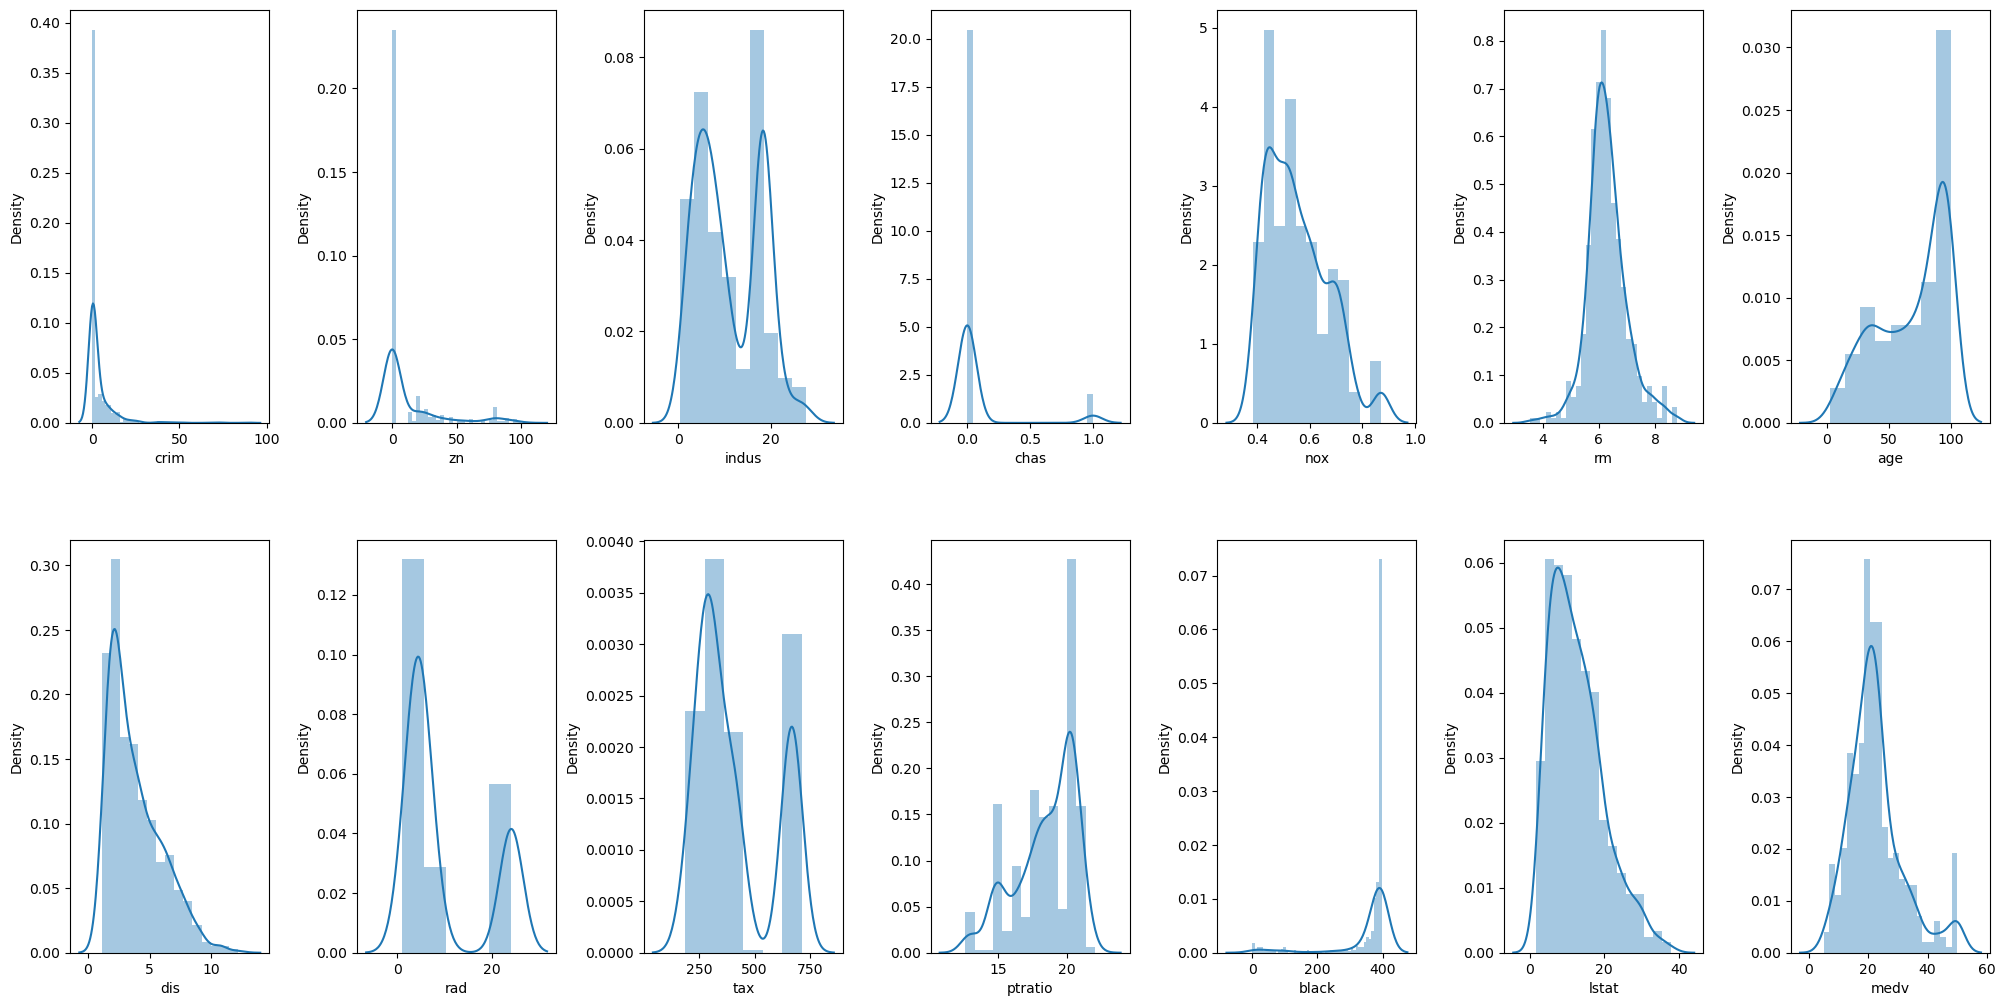

In [43]:
# create dist plot
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in boston.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

<Axes: >

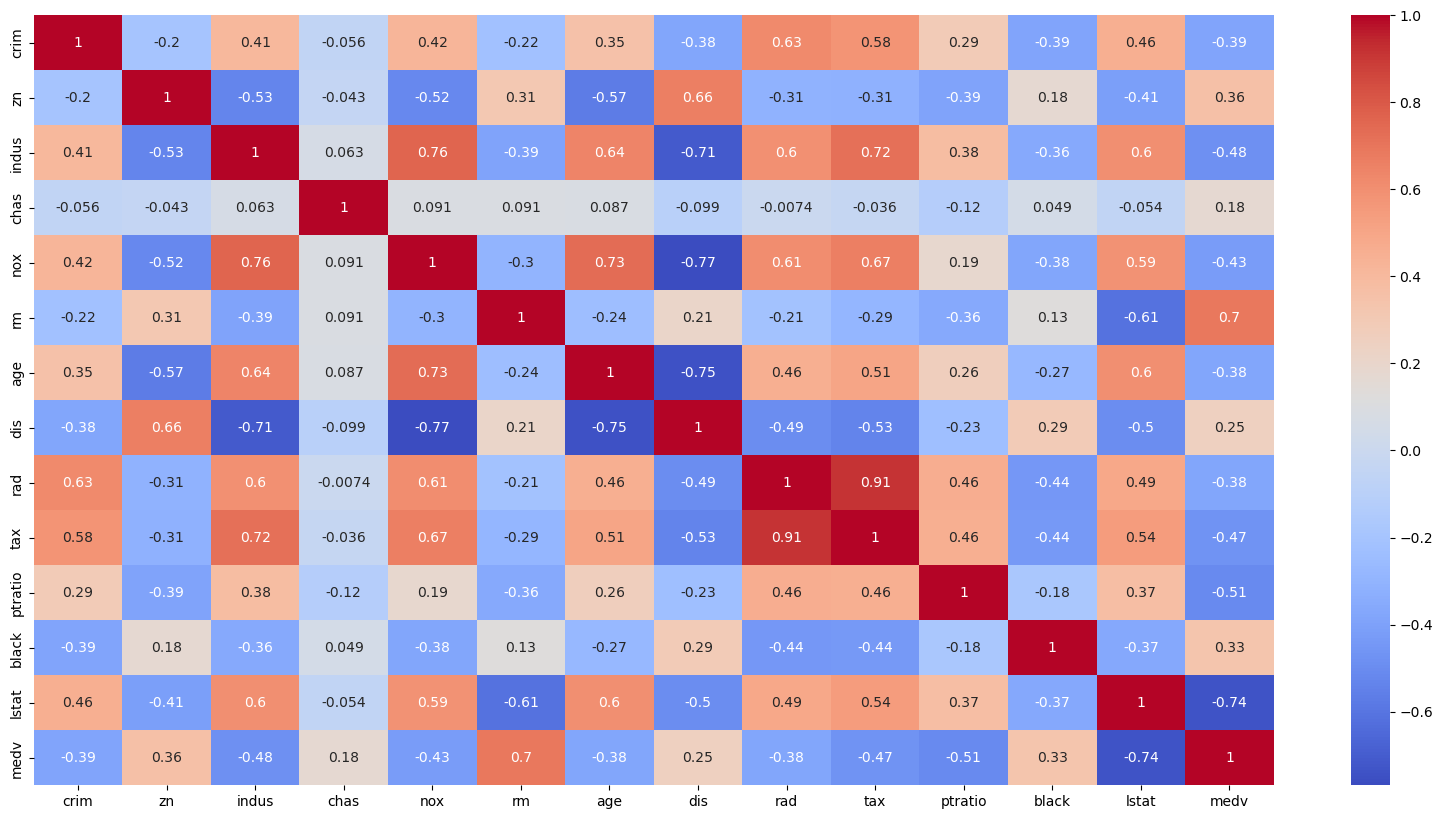

In [44]:
corr = boston.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

<Axes: xlabel='lstat', ylabel='medv'>

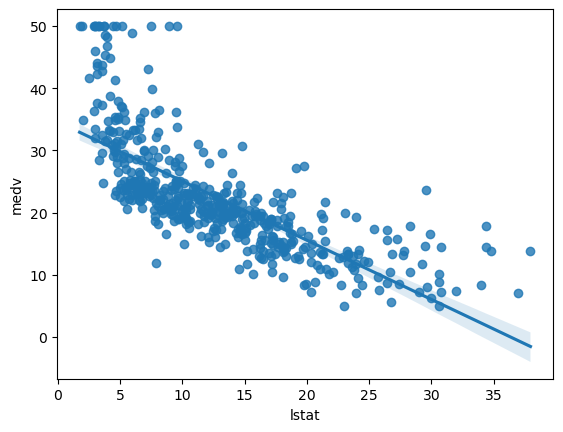

In [45]:
sns.regplot(y=boston['medv'], x=boston['lstat'])

<Axes: xlabel='rm', ylabel='medv'>

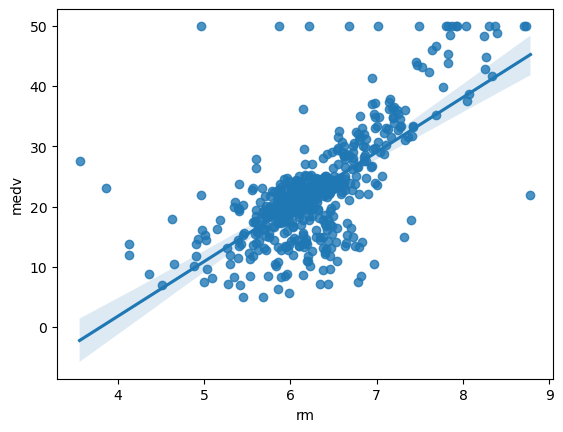

In [46]:
sns.regplot(y=boston['medv'], x=boston['rm'])

# initalize the linear regrestion model

In [15]:
reg=linear_model.LinearRegression()
x=boston.drop(columns=['rad','medv'])
y=boston['medv']

# split the data into 67% Traning and 33% testing

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [18]:
reg.fit(x_train,y_train)

LinearRegression()

# coeffecients/weights of each column/feature of our model 

In [19]:
print(reg.coef_)

[-2.54498383e-03 -8.77256841e-02  3.05850895e-02 -5.88102609e-04
  3.66940613e+00 -1.37067893e+01  4.16658472e+00 -2.02098635e-02
 -1.40816529e+00  3.48894559e-03 -8.22261627e-01  1.10922692e-02
 -5.42578325e-01]


In [22]:
y_predt=reg.predict(x_test)
print(y_predt)

[28.37588946 36.35744423 18.79980084 26.07158737 17.92665983 24.05789602
 16.99896307 15.54908817 21.66182328 20.51625189 24.19147925 18.39804225
 -5.82980153 22.86734286 18.52317655 25.30039947 18.6965479   5.10518541
 39.83167571 16.77336483 26.93301737 29.46787253 11.56810881 23.87335764
 17.30898756 14.76160496 24.30172629 14.12399143 22.23187259 19.30239424
 21.78941039 24.75900403 25.22491933 17.67996388 15.39915792 18.28475266
 31.29138594 19.13370687 24.1145002  25.59384588 13.88605172 29.99410914
 41.41113628 18.60979245 27.62972702 16.37244054 14.40864042 26.83712702
 19.110887   31.29025595 21.18467534 32.72343482 16.28877309 27.41700922
 38.50710369 22.00054208 18.03902292 32.19538361 25.02276104 12.24621651
 22.11067506 30.09875355 31.16840964 17.46333225 22.07058497 16.37086321
 19.67379087 26.47164531 31.27776296 11.29633146 20.43891331 26.41109887
 10.48185903 17.1738948  25.07346496  5.87907756 22.52317017 40.15207776
 17.88207451 12.88397708 22.23025531 12.02026476 22

# actual result

In [23]:
print(y_test)

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
110    21.7
321    23.1
265    22.8
29     21.0
262    48.8
Name: medv, Length: 167, dtype: float64


# check the model performance and accuracy

In [26]:
print(np.mean((y_predt-y_test)**2))

22.6595809670095
